# Final Team Project

# Andrew Kim, Luis Perez, Renetta Nelson

# October 17, 2022

## Problem Statement

>The purpose of this project is to automate the wine selection process in order to increase profit and
build on the business's reputation. This will be done by implementing a model that predicts the
quality of the wine. The profit margin of restaurants is approximately 70%. This means that over half the profit of
these business types come from wine. On the other hand, there are also major expenses that pertain
to wine as well. From vendors to sommeliers, there are dozens of additional expenses when it
comes to finding and purchasing good quality wine. The profits of the business can no longer support the expenses of the wine selection process. Within a few months, the expenses will exceed the profits of the business and the business will
have to close down. The automation of the wine selection process will reduce the expenses by
approximately 25%, allowing the business to build its finances and stay in business.




In [128]:
#Import Libraries
import pandas as pd
import numpy as np
import random
import statistics as stats
import scikitplot as skplt
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import dmba
import warnings
warnings.filterwarnings("ignore")

from sklearn import preprocessing, datasets, linear_model
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, r2_score, plot_confusion_matrix, classification_report, confusion_matrix, roc_curve
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from dmba import classificationSummary, gainsChart, liftChart

from dmba.metric import AIC_score
from sklearn import svm
from sklearn.svm import SVC
from dmba import regressionSummary, adjusted_r2_score, AIC_score, BIC_score


In [110]:
#load dataset and put into a data frame

redwine_data = pd.read_csv("winequality-red.csv")

redwine_df = pd.DataFrame(redwine_data)

#Display first five rows of dataframe to confirm 

redwine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Data Preprocessing

The uploaded wine dataset was preprocessed, which involved evaluating any necessary modifications needed, from outliers, correlations, or missing values, towards the dataset as a prepatory procedure for the final model. The shape of the dataset features 1,599 entries with 12 columns with no missing data detected. Since the objective is to develop a model that predicts the quality of the wine, the 'quality' predictor was designated as the target variable. There were six unique elements of an array (values 3 to 8) within the 'quality' predictor, and each element served as a scale to rate the quality of the wine. The next procedure made to the dataset was to detect any outliers within each predictor using the Z method, which also calculated the predictors' mean  and standard deviation. The dataset contained many outliers, with 'total sulfur dioxide' predictor containing the most. Lastly, a heatmap was created to assess the correlations of the predictors. The  'density' predictor shared a strong positive correlation value of 0.67 with 'fixed acidity' and 'citric acid'. On the contrary, 'fixed acidity' and 'pH' shared a strong negative correlation value of -0.68.

In [49]:
# Check type of variables
redwine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [50]:
redwine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [51]:
# Check for data size
redwine_df.shape

(1599, 12)

In [52]:
redwine_df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [53]:
redwine_df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [54]:
redwine_df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [55]:
# Removing Outliers

#based on the boxplots total sulfur dioxide has many outliers
d1= redwine_df['total sulfur dioxide']
mean = np.mean(redwine_df['total sulfur dioxide'])
std = np.std(redwine_df['total sulfur dioxide'])
print('mean of the dataset is', mean)
print('std. deviation is', std)


#z method
#total sulfur dioxide
out=[]
def Zscore_outlier(df):
    m = np.mean(df)
    sd = np.std(df)
    for i in df: 
        z = (i-m)/sd
        if np.abs(z) > 3: 
            out.append(i)
    print("Outliers:",out)
Zscore_outlier(redwine_df['total sulfur dioxide'])



#z method
#free sulfur dioxide
out=[]
def Zscore_outlier(df):
    m = np.mean(df)
    sd = np.std(df)
    for i in df: 
        z = (i-m)/sd
        if np.abs(z) > 3: 
            out.append(i)
    print("Outliers:",out)
Zscore_outlier(redwine_df['free sulfur dioxide'])

mean of the dataset is 46.46779237023139
std. deviation is 32.88503665178374
Outliers: [148.0, 153.0, 165.0, 151.0, 149.0, 147.0, 148.0, 155.0, 151.0, 152.0, 278.0, 289.0, 160.0, 147.0, 147.0]
Outliers: [52.0, 51.0, 50.0, 68.0, 68.0, 54.0, 53.0, 52.0, 51.0, 57.0, 50.0, 48.0, 48.0, 72.0, 51.0, 51.0, 52.0, 55.0, 55.0, 48.0, 48.0, 66.0]


<AxesSubplot:>

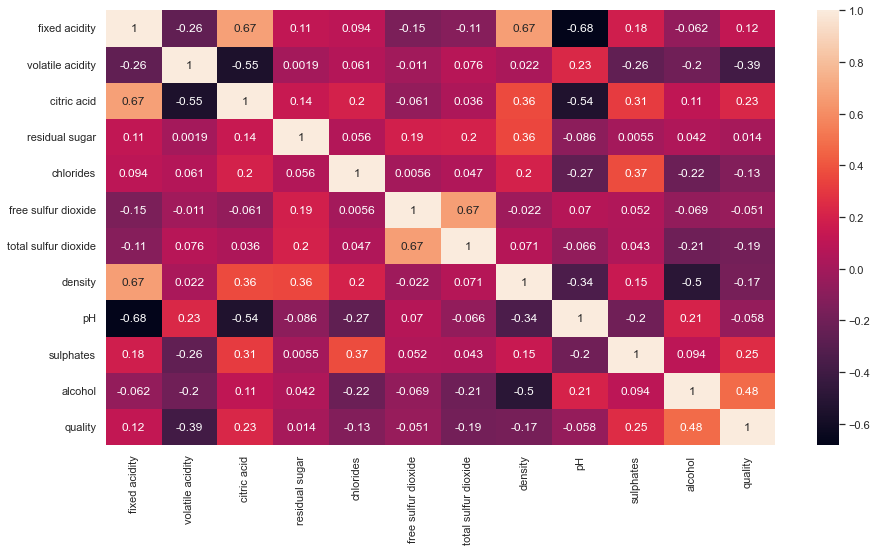

In [56]:
plt.figure(figsize = (15, 8))

sns.heatmap(redwine_df.corr(), annot = True)

# Explanatory Data Analysis (EDA)

> Explorory Data Analysis recap: Exploratory Data Analysis (EDA) was implemented to evaluate the qualities of each predictor within the dataset. This procedure involved generating a number of visualizations to identify certain trends of each predictor from the dataset, test hypotheses, and evaluate assumptions

Text(0, 0.5, 'Count')

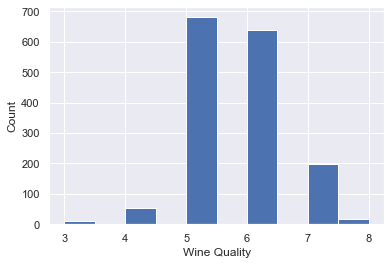

In [57]:
#Create histogram on 'quality' variable
sns.set()
redwine_df.quality.hist()
plt.xlabel('Wine Quality')
plt.ylabel('Count')

>> Explanation: Explanation: The first visualization made above was a histogram, which highlights the distributed quantity of the targeted predictor 'Wine Quality' since the objective is to create a model that predicts the quality of the wine as good or bad. It was found that the average quality-type wines (rated 5 or 6) generated the highest count, which also indicates that they were most distributed among businesses. The value count function above specifies the value of wines that fit each category, which they confirm the average-rated wines being distributed the most.

Text(0.5, 1.0, 'Relationship Between Fixed Acidity and Quality')

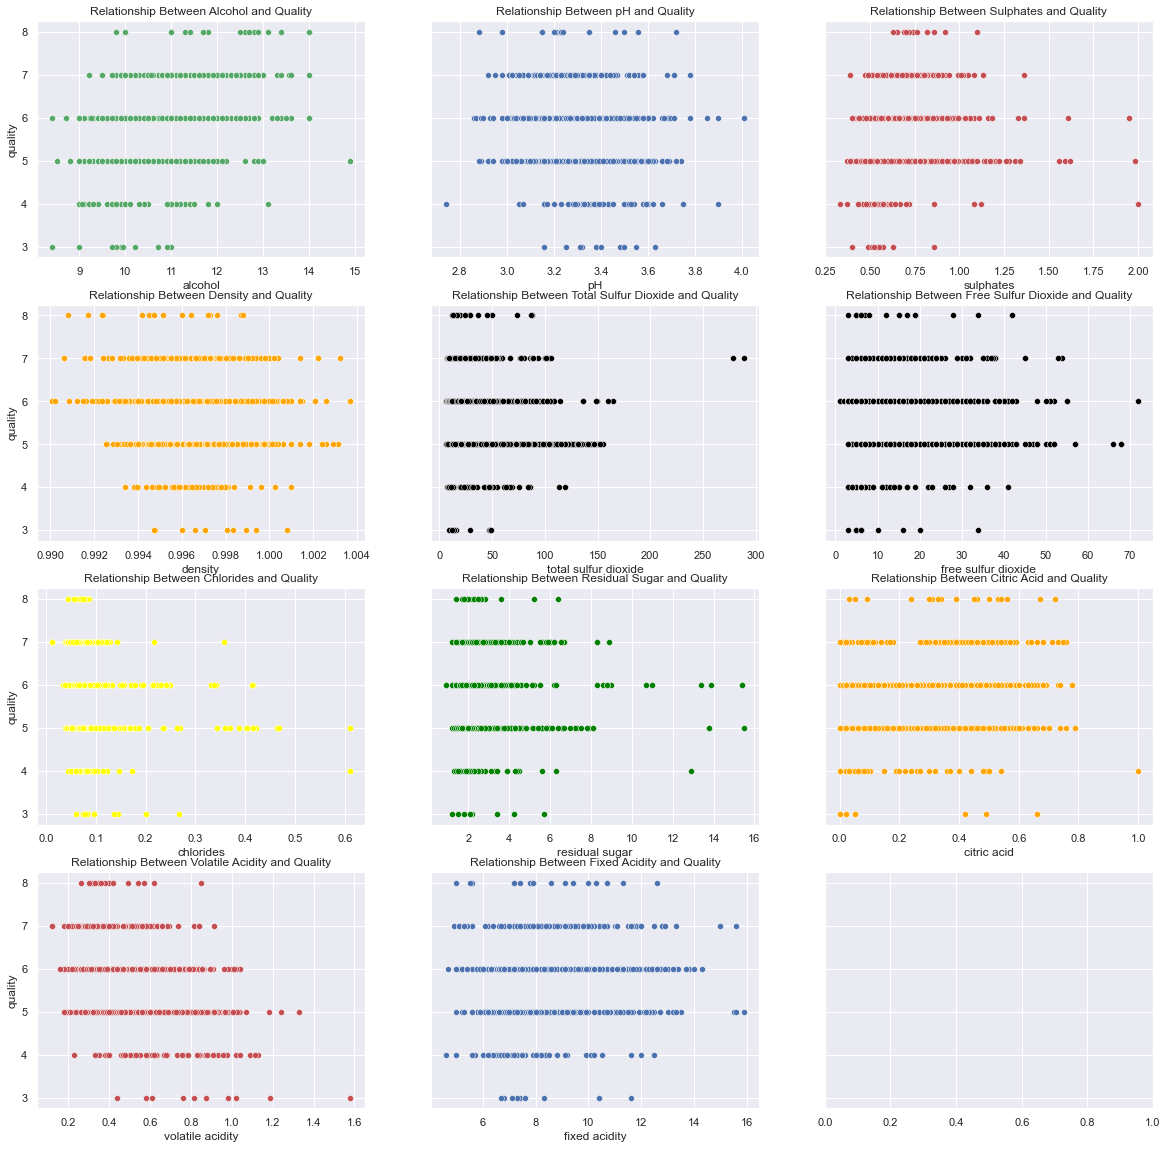

In [58]:
# Analyze the relationships between the predictors and the target variable ('quality').


fig, axes = plt.subplots(4, 3, figsize = (20,20), sharey = True)


sns.scatterplot(ax = axes[0,0], data = redwine_df, y = "quality", x = "alcohol", color = "g")
axes[0,0].set_title("Relationship Between Alcohol and Quality")

sns.scatterplot(ax = axes[0, 1], data = redwine_df, y = "quality", x = "pH", color = "b")
axes[0,1].set_title("Relationship Between pH and Quality")

sns.scatterplot(ax = axes[0, 2], data = redwine_df, y = "quality", x = "sulphates", color = "r")
axes[0,2].set_title("Relationship Between Sulphates and Quality")

sns.scatterplot(ax = axes[1,0], data = redwine_df, y = "quality", x = "density", color = "orange")
axes[1,0].set_title("Relationship Between Density and Quality")

sns.scatterplot(ax = axes[1,1], data = redwine_df, y = "quality", x = "total sulfur dioxide", color = "black")
axes[1,1].set_title("Relationship Between Total Sulfur Dioxide and Quality")

sns.scatterplot(ax = axes[1,2], data = redwine_df, y = "quality", x = "free sulfur dioxide", color = "black")
axes[1,2].set_title("Relationship Between Free Sulfur Dioxide and Quality")

sns.scatterplot(ax = axes[2,0], data = redwine_df, y = "quality", x = "chlorides", color = "yellow")
axes[2,0].set_title("Relationship Between Chlorides and Quality")

sns.scatterplot(ax = axes[2,1], data = redwine_df, y = "quality", x = "residual sugar", color = "green")
axes[2,1].set_title("Relationship Between Residual Sugar and Quality")

sns.scatterplot(ax = axes[2,2], data = redwine_df, y = "quality", x = "citric acid", color = "orange")
axes[2,2].set_title("Relationship Between Citric Acid and Quality")

sns.scatterplot(ax = axes[3,0], data = redwine_df, y = "quality", x = "volatile acidity", color = "r")
axes[3,0].set_title("Relationship Between Volatile Acidity and Quality")

sns.scatterplot(ax = axes[3,1], data = redwine_df, y = "quality", x = "fixed acidity", color = "b")
axes[3,1].set_title("Relationship Between Fixed Acidity and Quality")



>> Explanation: The next step was to analyze the relationships between the predictors and 'quality'. Using scatterplots to distribute a visual representation of each predictor versus 'quality', all predictors were found to have a strong relationship between the average-rated wine qualities. From the visualizations, the quality-type wines that were rated 5 or 6 garnered most of each predictor. The scatterplots also indicated a strong presence of outliers within certain predictors that includes 'sulfur dioxide', 'residual sugar', and 'chlorides'.


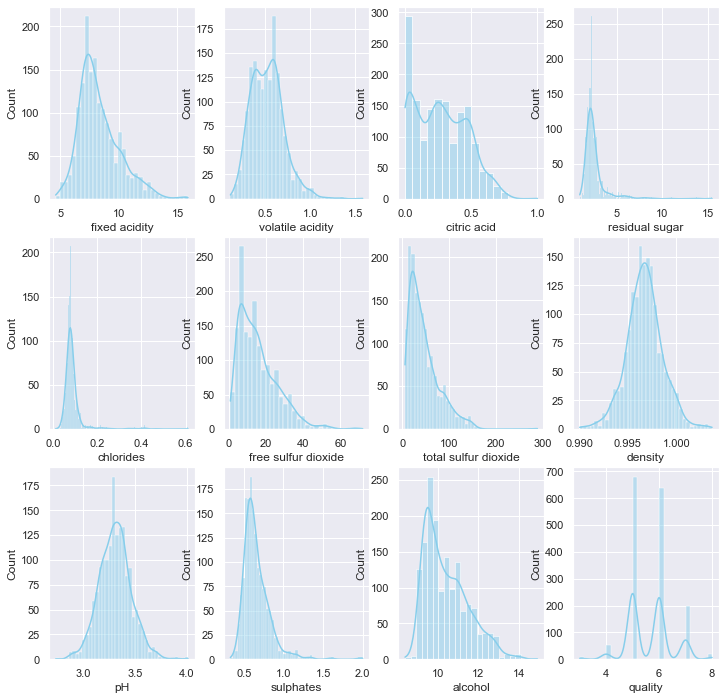

In [59]:
# Histogram

fig, axs = plt.subplots(3, 4, figsize=(12, 12))
columns = redwine_df.columns[:12]
k=0
sns.set(font_scale=1)
for i in range(3):
    for j in range(4):
        sns.histplot(data=redwine_df, x=columns[k], kde=True, color="skyblue", ax=axs[i, j])
        k+=1

>> Explanation: Explanation: Based on the histograms above we can see each columns distribution. We can see that fixed acidity, density, and PH have normal distributions. While the other columns do not follow normal distributions. Volatile acidity, citric acid, and quality appear to have more of a bimodal or multimodial distribution. One of the columns that jumps out is quality as per our objective is to automate the wine selection we can transform the quality selection to better fit a normal distribution to have a better understandment of the what makes a wine be good quality

Text(0.5, 1.0, 'Fixed Acidity vs. Quality')

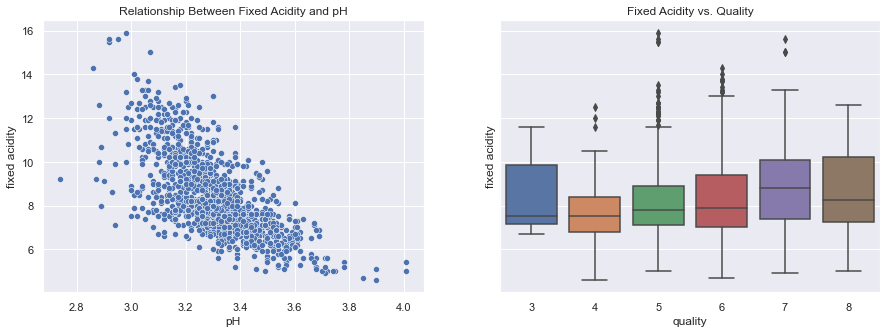

In [60]:
fig, axes = plt.subplots(1, 2, figsize = (15, 5), sharey = True)

sns.scatterplot(ax = axes[0], data = redwine_df, y = "fixed acidity", x = "pH")
axes[0].set_title("Relationship Between Fixed Acidity and pH")

sns.boxplot(ax = axes[1], data = redwine_df, y = "fixed acidity", x = "quality")
axes[1].set_title("Fixed Acidity vs. Quality")

>> Explanation: The following visuals above assessed the relationship between 'fixed acidity' to 'pH' and 'quality'. For the scatterplot on the left, 'fixed acidity' and 'pH' share a strong negative correlation, where a decrease in 'fixed acidity' leads to an increse in 'pH'. For the boxplot, a majority of the wine qualities lean towards the distribution of 'fixed' acidity' and 'quality' being positively skewed. Outliers are clearly visualized for each wine quality type when assessing the relationship between 'fixed acidity' and 'quality'.



Text(0.5, 1.0, 'Residual Sugar vs. Quality')

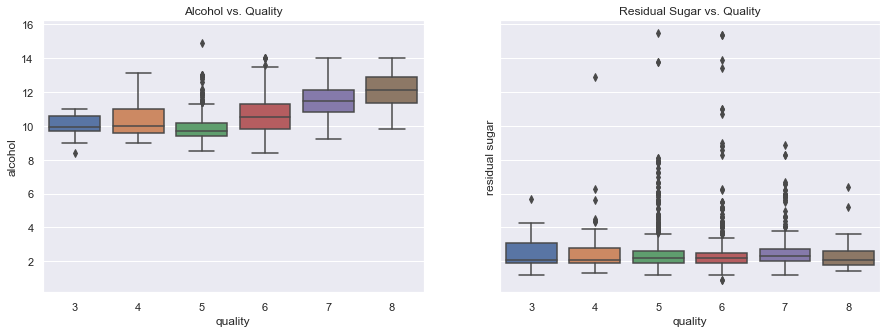

In [61]:
fig, axes = plt.subplots(1, 2, figsize = (15, 5), sharey = True)

sns.boxplot(ax = axes[0], data = redwine_df, y = "alcohol", x = "quality")
axes[0].set_title("Alcohol vs. Quality")

sns.boxplot(ax = axes[1], data = redwine_df, y = "residual sugar", x = "quality")
axes[1].set_title("Residual Sugar vs. Quality")

>> Explanation: The visuals above feature boxplots that depicts the relationship of 'pH' to 'alcohol' and 'residual sugar'. The high-rated wine qualities that contain alcohol feature a distribution that is normally distributed while the low-rated wine qualities with alcohol are more skewed to the left. Heavy presence of outliers were detected while evaluating the relationship between 'residual sugar' and 'quality'.


# Data Splitting

The wines with a score quality below or equal to 5 were changed to 0, which indicated that they were not in good quality. The wines with a score quality that were greater than or equal to 6 were changed to 1, which indicated that they were in good quality. As a result, this changes the classification from multiclass to binary. 

In [62]:
redwine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [111]:
for idx in redwine_df.index:
    if redwine_df["quality"][idx] <=5:
        redwine_df["quality"][idx] = 0
        
    if redwine_df["quality"][idx] >=6:
        redwine_df["quality"][idx] = 1
        
redwine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [112]:
#Set target variable to y and the remaining predictors to x
y = redwine_df['quality'].to_numpy()
x = redwine_df.drop(columns=['quality'])

In [113]:
#Standardize the dataset
scaler = preprocessing.StandardScaler()
x_norm = scaler.fit_transform(x * 1.0)

In [114]:
#Split the full dataframe into 60/40.
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.4, random_state=1)
train_x.shape, test_x.shape

((959, 11), (640, 11))

# Data Modeling

### LDA

One of the reasons we chose to include linear discriminant analysis as part of the models was the simplicity and effectiveness of the model. Although regarded as simple, lda as a classification model is robust and interpretable. LDA can be used for dimensionality reducer, visualizer, and classifier. In our case, we focus on LDA as a classifying model in aims to automate wine selection. Based on our confusion matrix (below) our model's cross validation score is: 73.62%

In [115]:
# initializing the model with 2 components
lda = LinearDiscriminantAnalysis(n_components=1)

# fitting the dataset
X_r2 = lda.fit(x, y).transform(x)

              precision    recall  f1-score   support

           0       0.71      0.73      0.72       446
           1       0.76      0.74      0.75       513

    accuracy                           0.74       959
   macro avg       0.74      0.74      0.74       959
weighted avg       0.74      0.74      0.74       959

Cross Val Score:  0.7361965532286213


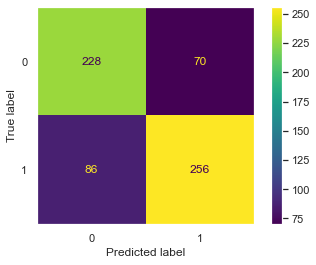

In [116]:
lda_pred_t = lda.predict(train_x)
lda_pred_v = lda.predict(test_x)
lda_pred_prob_v = (lda.predict_proba(test_x))


#Cross Validation Score of LDA
lda_score = cross_val_score(lda, train_x, train_y, cv=5)
print(classification_report(train_y,lda_pred_t))
print("Cross Val Score: ", stats.mean(cross_val_score(lda, train_x, train_y, cv=5)))

#plot confusion matrix
plot_confusion_matrix(lda,test_x,test_y)
plt.grid(False)

### Gradient Boosting

Gradient Boosting is a great model that can be used for regression, classification, and ranking. In our case, to automate the wine process we decided to classify wines into two categories as either high (1) or low (0) quality. Gradient boosting is an excellent choise as it has methods that can enhance the algorithm's performance. In our case, we performed grid search to know the best paramenters for this model.


In [117]:
gradient_booster = GradientBoostingClassifier()
parameters = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}

In [118]:
## Print out the best Parameters.
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [119]:
gb = GradientBoostingClassifier(learning_rate=0.01, max_depth=3, n_estimators=250)

## Fit our model
gb.fit(train_x,train_y)

GradientBoostingClassifier(learning_rate=0.01, n_estimators=250)

              precision    recall  f1-score   support

           0       0.81      0.82      0.82       446
           1       0.84      0.83      0.84       513

    accuracy                           0.83       959
   macro avg       0.83      0.83      0.83       959
weighted avg       0.83      0.83      0.83       959

Cross Val Score:  0.7476712478184991


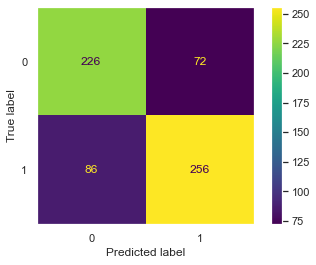

In [120]:
gb_pred_t = gb.predict(train_x)
gb_pred_v = gb.predict(test_x)
gb_pred_prob_v = (gb.predict_proba(test_x))


#Cross Validation Score of LDA
lda_score = cross_val_score(gb, train_x, train_y, cv=5)
print(classification_report(train_y,gb_pred_t))
print("Cross Val Score: ", stats.mean(cross_val_score(gb, train_x, train_y, cv=5)))

#plot confusion matrix
plot_confusion_matrix(gb,test_x,test_y)
plt.grid(False)

### Logistic Regression

Another model that was chosen for this project was logistic regression. The main aspect that made this model relatable towards our project's goal was its ability to predict a binary outcome based on observations within a data set. It also has the ability to describe the data and to explain relationship between one dependent binary variable with additional independent variables. These aspects made the logistic regression model relatable towards our goal in predicting the wine types as either high (1) or low (0) quality. After fitting the data before making predictions with the test data set and plotting a classification report with confusion matrix, this model generated an accuracy score of 75% and a cross validation score of 73.83%. 

              precision    recall  f1-score   support

           0       0.74      0.73      0.73       298
           1       0.77      0.77      0.77       342

    accuracy                           0.75       640
   macro avg       0.75      0.75      0.75       640
weighted avg       0.75      0.75      0.75       640

Cross Val Score:  0.7382744328097731


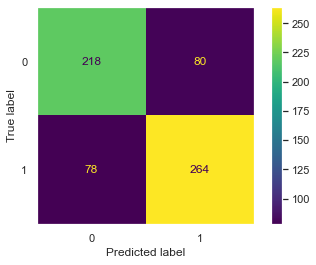

In [121]:
logit_reg = LogisticRegression().fit(train_x, train_y)
y_pred = logit_reg.predict(test_x)

plot_confusion_matrix(logit_reg, test_x, test_y)
plt.grid(False)

print(classification_report(test_y, y_pred))

print("Cross Val Score: ", stats.mean(cross_val_score(logit_reg, train_x, train_y, cv = 5)))

### Random Forest

The random forest algorithm was chosen because of its ability to handle classification-type problems towards large datasets and to assess the features that contribute towards an objective. Since all the features contributed towards the objective of evaluating which wine type qualities were good or bad, they were all included to assess the accuracy level of the data set from this algorithm. The random forest algorithm generated the highest accuracy score of 80% and a cross validation score of 79.04%. 

              precision    recall  f1-score   support

           0       0.77      0.81      0.79       298
           1       0.83      0.79      0.81       342

    accuracy                           0.80       640
   macro avg       0.80      0.80      0.80       640
weighted avg       0.80      0.80      0.80       640

Cross Val Score:  0.7904232111692845


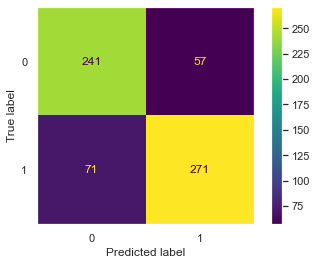

In [122]:
rf = RandomForestClassifier().fit(train_x, train_y)
rf_pred = rf.predict(test_x)

plot_confusion_matrix(rf, test_x, test_y)
plt.grid(False)

print(classification_report(test_y, rf_pred))

print("Cross Val Score: ", stats.mean(cross_val_score(rf, train_x, train_y, cv = 5)))

### Decision Trees

One of the aspects of decision trees that was relatable to our project goal was its ability to effectively choose between various actions. For this project, supervised learning would be the best route to go. The objective is to predict which wines are low quality (0) and high quality (1). Part of the process in determining the output is understanding how the output was chosen. By using decision tree, we can examine the choices made in the process and what role the predictors played. After fitting the data, predictions were made with the testing data. A confusion matrix was plotted along with a classification report showing how well the model performed. The accuracy score for this model is 73% and the cross validation score is 71.84%. Recall gives a general overview saying of the total amount of actual good quality values, which were correctly predicted as good quality. Precision notes the number of predicted good quality values that contained a true value of 6 or higher. F1-score focuses on recall and precision simultaneously, and it also comapres the performance of the two metrics.

              precision    recall  f1-score   support

           0       0.69      0.76      0.72       298
           1       0.77      0.70      0.74       342

    accuracy                           0.73       640
   macro avg       0.73      0.73      0.73       640
weighted avg       0.73      0.73      0.73       640

Cross Val Score:  0.7184009598603839


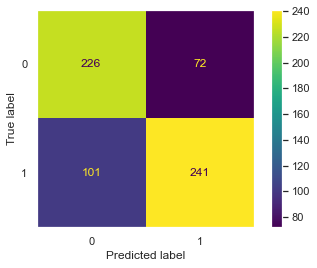

In [123]:
decisiontree = DecisionTreeClassifier().fit(train_x, train_y)
dt_pred = decisiontree.predict(test_x)
plot_confusion_matrix(decisiontree, test_x, test_y)
plt.grid(False)
print(classification_report(test_y, dt_pred))
print("Cross Val Score: ", stats.mean(cross_val_score(decisiontree, train_x, train_y, cv = 5))) 

### Neural Network

When looking into which wines have good or poor quality, the balance of the components play a huge role. It is not solely about if a wine was high in pH or low in sweetness, thus making it bitter. It is about the combination of each ingredient and how they complement each other. This is one of the reasons why wine tastes better with age because it gives the components time to mix and balance each other out. When creating a model to predict which wine has good or bad quality, part of the process is to determine the relationship between each predictors (the components of the wine). Neural networks meets this task.

              precision    recall  f1-score   support

           0       0.71      0.75      0.73       298
           1       0.77      0.73      0.75       342

    accuracy                           0.74       640
   macro avg       0.74      0.74      0.74       640
weighted avg       0.74      0.74      0.74       640

Cross Val Score:  0.7268160994764398


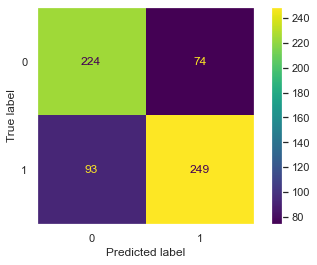

In [124]:
neuralnet = MLPClassifier(hidden_layer_sizes = (3), activation = 'logistic',
                          solver = 'lbfgs', random_state =1).fit(train_x, train_y)

nnet_pred = neuralnet.predict(test_x)
                          
plot_confusion_matrix(neuralnet, test_x, test_y)
plt.grid(False)
                          
print(classification_report(test_y, nnet_pred))
                          
print("Cross Val Score: ", stats.mean(cross_val_score(neuralnet, train_x, train_y, cv=5)))

### K-Nearest Neighbors (KNN)

The K-Nearest Neighbors model was used as our baseline model for this project. This model, however, generated the lowest accuracy score (64%) and the lowest cross validation score (65.28%).

              precision    recall  f1-score   support

           0       0.61      0.62      0.61       298
           1       0.66      0.65      0.66       342

    accuracy                           0.64       640
   macro avg       0.64      0.64      0.64       640
weighted avg       0.64      0.64      0.64       640

Cross Val Score:  0.6527814136125655


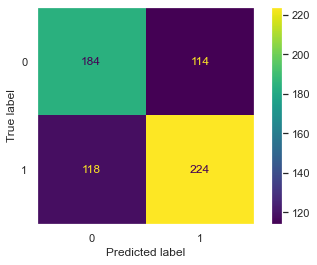

In [126]:
kneighbors = KNeighborsClassifier().fit(train_x, train_y)
knn_pred = kneighbors.predict(test_x)

plot_confusion_matrix(kneighbors, test_x, test_y)
plt.grid(False)

print(classification_report(test_y, knn_pred))

print("Cross Val Score: ", stats.mean(cross_val_score(kneighbors, train_x, train_y, cv=5)))

# Model Selection

The final procedure that was implemented was selecting our ideal model for our objective. Based on comparing the results from each model and plotting them in a line graph, the random forest algorithm serves as the ideal model that can distinguish between good and bad quality-type wines. This model generated both the highest accuracy score (80%) and cross validation score (79.04%). 

In [132]:
y_pred_prob1 = lda.predict_proba(test_x)[:,1]
fpr_lda, tpr_lda, thresholds_lda = roc_curve(test_y, y_pred_prob1)

y_pred_prob2 = gb.predict_proba(test_x)[:,1]
fpr_gb, tpr_gb, thresholds_gb = roc_curve(test_y, y_pred_prob2)

y_pred_prob3 = logit_reg.predict_proba(test_x)[:,1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(test_y, y_pred_prob3)

y_pred_prob4 = rf.predict_proba(test_x)[:,1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(test_y, y_pred_prob4)

y_pred_prob5 = decisiontree.predict_proba(test_x)[:,1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(test_y, y_pred_prob5)

y_pred_prob6 = neuralnet.predict_proba(test_x)[:,1]
fpr_nn, tpr_nn, thresholds_nn = roc_curve(test_y, y_pred_prob6)

y_pred_prob7 = kneighbors.predict_proba(test_x)[:,1]
fpr_knn, tpr_knn, thresholds_knn = roc_curve(test_y, y_pred_prob7)


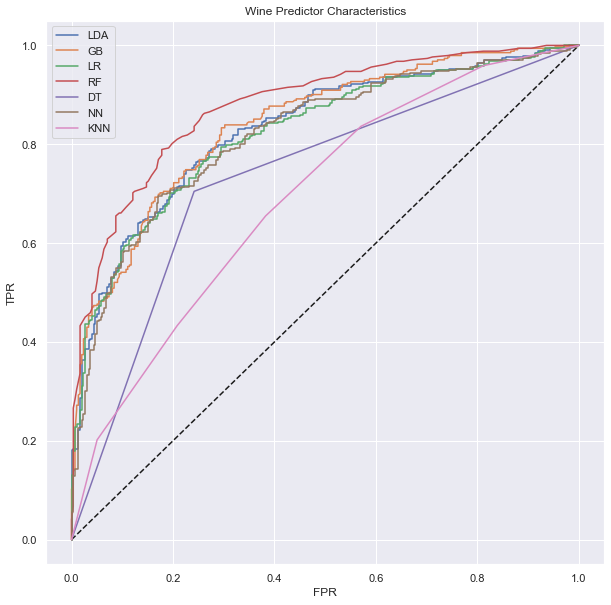

In [134]:
plt.figure(figsize = (10, 10))
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr_lda, tpr_lda, label = 'LDA')
plt.plot(fpr_gb, tpr_gb, label = 'GB')
plt.plot(fpr_lr, tpr_lr, label = 'LR')
plt.plot(fpr_rf, tpr_rf, label = 'RF')
plt.plot(fpr_dt, tpr_dt, label = 'DT')
plt.plot(fpr_nn, tpr_nn, label = 'NN')
plt.plot(fpr_knn, tpr_knn, label = 'KNN')
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Wine Predictor Characteristics')
plt.show()
